<h1>Exploration des réseaux</h1>

1) Lit les noeuds des réseaux et creer un tableau avec les lignées cellulaire en colonnes la liste des noeuds en ligne
2) met un 0 si le noeud est absent et 1 si le noeud est présent
   

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from upsetplot import plot, generate_data, generate_counts
import networkx as nx
import near_shortest_undirected
import nearshortest
import pandas as pd
import numpy as np
import scipy
import warnings
import ipywidgets
from ipywidgets import widgets
from matplotlib.patches import Patch

warnings.filterwarnings('ignore')

<H1>Matrice des noeuds présents dans chaque réseau des lignées cellulaire</H1>

In [17]:

input_folder="reconstruct_200324_cyto_rnaseq64_all_pathways/"
nodes=[]
cell_lines=[]
uni_to_name={}
for f in listdir(input_folder):
    cell_lines.append(f)
    node_count=0
    file_name=""
    

    file_name=input_folder+f+"/all_targets/"+f+"_shortest_all_targets.txt_nodes.tsv"
    file=open(file_name,'r')
    file.readline()
    
    for line in file:
        uni_to_name[line.strip().split('\t')[0]]=line.strip().split('\t')[1]
        if line.strip().split('\t')[1] not in nodes:
            nodes.append(line.strip().split('\t')[1])
            
    file.close()


print(len(nodes))


df=pd.DataFrame(nodes,columns=['nodes'])
for f in listdir(input_folder):
    current_CL_nodes=[]
    vector=[]
    node_count=0
    file_name=""
    file_name=input_folder+f+"/all_targets/"+f+"_shortest_all_targets.txt_nodes.tsv"
    file=open(file_name,'r')
    file.readline()
    for line in file:
        current_CL_nodes.append(line.strip().split('\t')[1])
    for node in nodes:
        if node in current_CL_nodes:
            vector.append(1)
        else:
            vector.append(0)
    df[f]=vector

    
    file.close()   

df.set_index('nodes',inplace=True)
print(df.columns)








2834
Index(['XG30', 'XG11', 'OPM2', 'XG23', 'SKMM2', 'Lopra', 'XG27', 'RPMI',
       'MOLP2', 'XG13', 'XG26', 'MOLP8', 'XG19', 'XG24', 'L363', 'JJN3', 'XG1',
       'XG28', 'MM1S', 'XG2', 'AMO1', 'XG16', 'XG12', 'XG7', 'XG6', 'LP1',
       'XG20', 'XG5', 'XG29'],
      dtype='object')


<h1>Nettoyage des données</h1>

In [18]:
count_node_occ=df.sum(axis=1).sort_values(ascending=False)
print(count_node_occ)
df3=pd.DataFrame(count_node_occ,columns=["occurence"])
print(df3[df3['occurence']==29])
print(len(df3[df3["occurence"]>28]))
print(len(df3[df3["occurence"]==1]))




nodes
MDM2       29
PIK3CB     29
PIK3R3     29
STAT3      29
RAC1       29
           ..
ABCB4       1
HMGCLL1     1
ACSS3       1
PARD6G      1
RHNO1       1
Length: 2834, dtype: int64
        occurence
nodes            
MDM2           29
PIK3CB         29
PIK3R3         29
STAT3          29
RAC1           29
BIRC5          29
PIK3CG         29
AKT1           29
AKT2           29
NRAS           29
PIK3R1         29
PIK3CA         29
CDC42          29
MAPK14         29
MYC            29
15
620


In [19]:
print(df3[df3["occurence"] ==30])
df_reduced1=df.drop(df3[df3["occurence"] ==30].index,axis=0)
print(df_reduced1)
df_reduced=df_reduced1.drop(df3[df3["occurence"] <2].index,axis=0)


Empty DataFrame
Columns: [occurence]
Index: []
        XG30  XG11  OPM2  XG23  SKMM2  Lopra  XG27  RPMI  MOLP2  XG13  ...  \
nodes                                                                  ...   
TP53       1     1     1     1      1      1     1     1      1     1  ...   
EZH2       1     0     1     1      1      0     1     1      1     1  ...   
ATM        1     1     1     1      1      1     1     1      1     1  ...   
NOTCH2     1     1     1     1      1      0     1     1      0     1  ...   
PTCH1      1     0     0     0      0      0     0     1      0     0  ...   
...      ...   ...   ...   ...    ...    ...   ...   ...    ...   ...  ...   
RAD17      0     0     0     0      0      0     0     0      0     0  ...   
RAD1       0     0     0     0      0      0     0     0      0     0  ...   
RAD9A      0     0     0     0      0      0     0     0      0     0  ...   
RAD9B      0     0     0     0      0      0     0     0      0     0  ...   
RHNO1      0     

<h1>tentative upsetplot</h1>

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

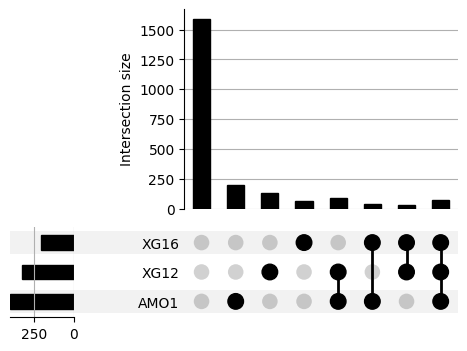

In [20]:
small_df_test=df_reduced[['AMO1','XG16','XG12']]
print(small_df_test.groupby('nodes'))

plot(small_df_test.groupby(['AMO1','XG16','XG12']).size())

XG30  XG11  OPM2  XG23  SKMM2  Lopra  XG27  RPMI  MOLP2  XG13  XG26  MOLP8  XG19  XG24  L363  JJN3  XG1  XG28  MM1S  XG2  AMO1  XG16  XG12  XG7  XG6  LP1  XG20  XG5
0     0     0     0     0      0      0     0     0      0     0     0      0     0     0     0     0    0     0     0    0     0     0     1    1    0    0     1       1
                                                                                                                          1     0     0     0    1    0    0     0      11
                                                                                                                     1    0     0     0     0    0    0    1     0       1
                                                                                                                                                 1    0    0     0       1
                                                                                                               1     0    0     0     0     0    1    0

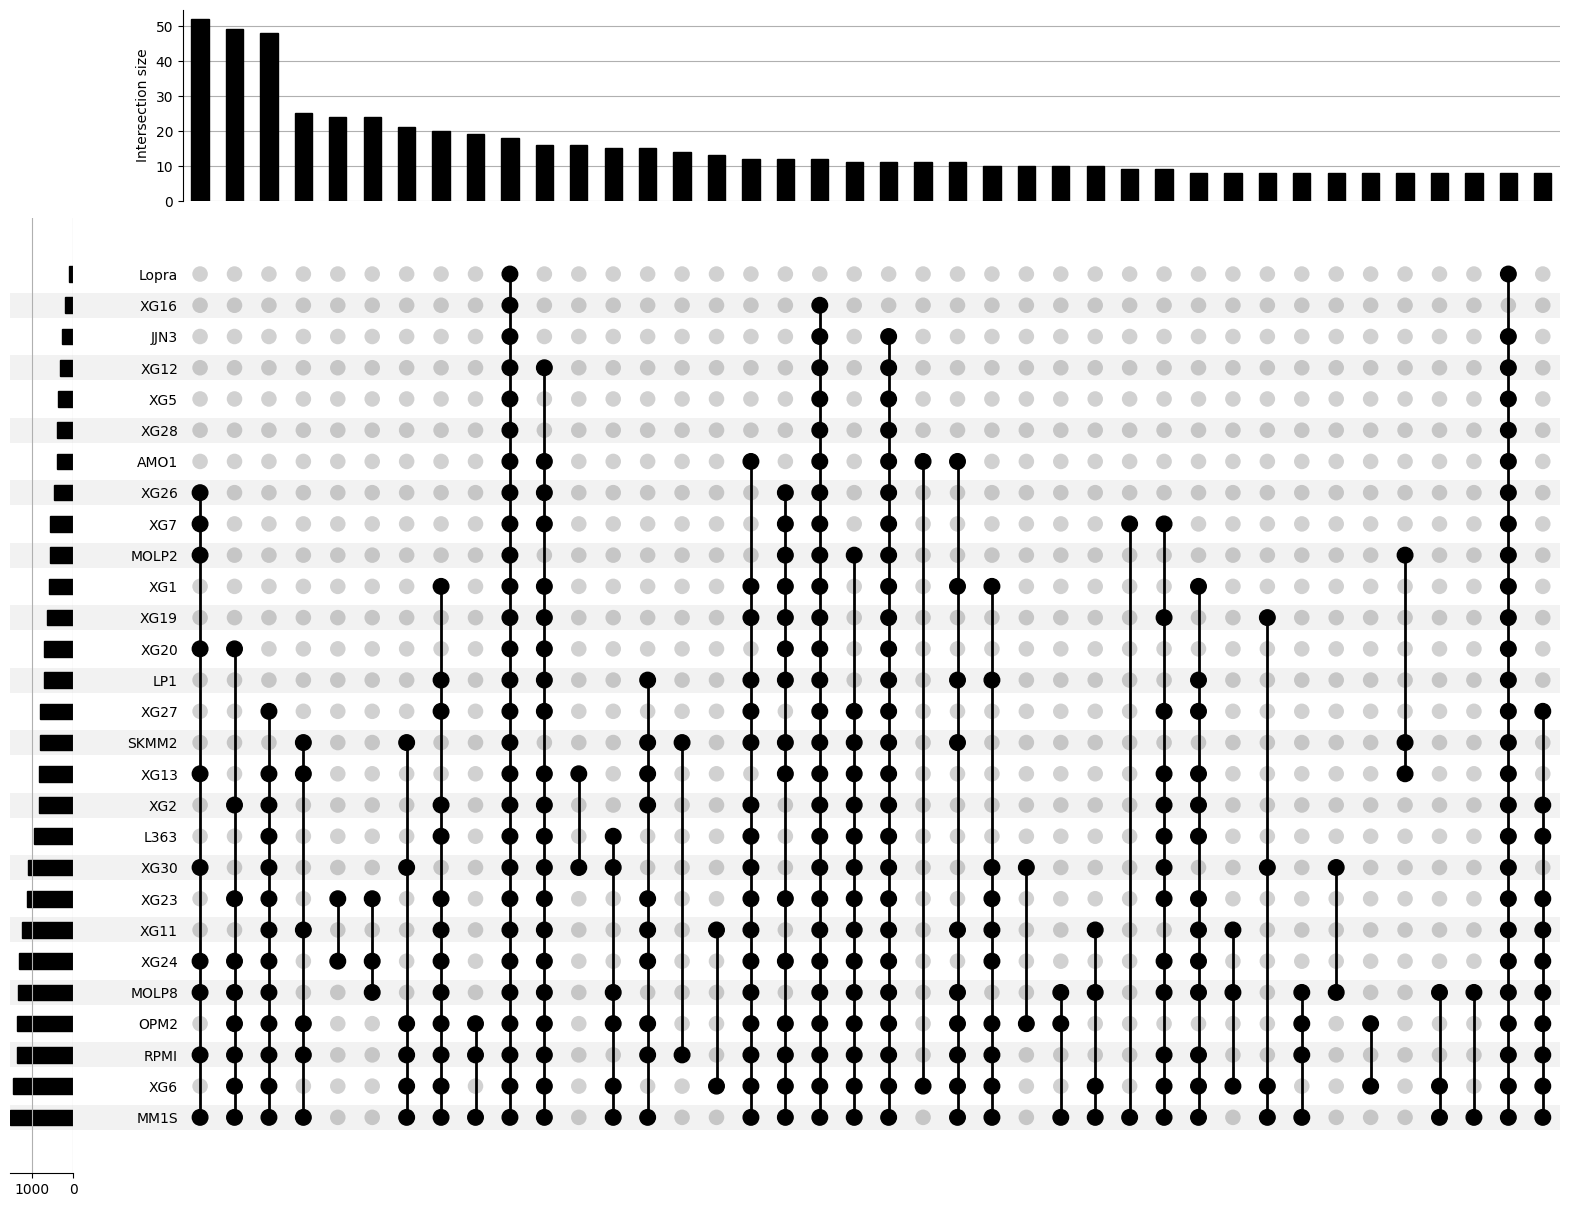

In [21]:

#a refaire
example = df_reduced.groupby(cell_lines[0:28]).size()
example.to_csv("test.csv")

#example = df_reduced.groupby(cell_lines).size()
print(example)
plot(example,max_subset_rank=30,sort_by='cardinality')
plt.show()



<h1>Clustering</h1>

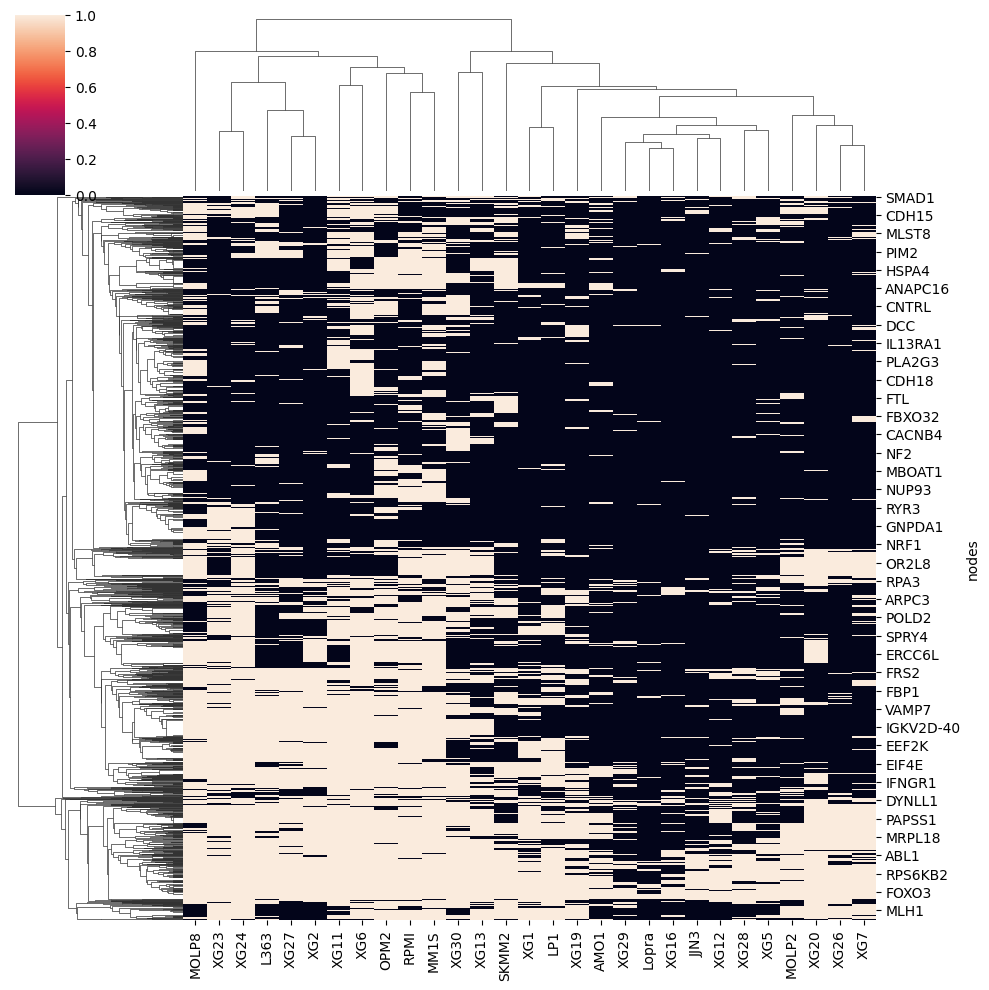

In [131]:
hierachic_cluster=sns.clustermap(df_reduced,xticklabels=True,metric='hamming',col_cluster=True)
hierachic_cluster.savefig("cluster_network_nodes.svg",format="svg")

Noeuds présents dans le groupe de gauche et noeuds absents groupe de droite

In [133]:
#cluster de gauche
df_clust1=hierachic_cluster.data2d
df_gauche=df_clust1.loc[:,'MOLP8':'SKMM2']
nb_occ_gauche=df_gauche.sum(axis=1).sort_values(ascending=False)

nodes_gauche=nb_occ_gauche[nb_occ_gauche==len(df_gauche.columns)]


#cluster de droite
nodes_gauche_absent=nb_occ_gauche[nb_occ_gauche<len(df_gauche.columns)]
print(nodes_gauche_absent)
df_droite=df_clust1.loc[:,'XG1':'XG7']
nb_occ_droite=df_droite.sum(axis=1).sort_values(ascending=False)

nodes_droite_absent=nb_occ_droite[nb_occ_droite==0]
nodes_droite_present=nb_occ_droite[nb_occ_droite==len(df_droite.columns)]
common_absent_nodes= nodes_droite_absent.index.intersection(nodes_gauche_absent.index)
#nodes_droite=nodes_droite.drop(common_absent_nodes)
nodes_droite_absent.to_csv('right_absent_nodes.csv') 
print(nodes_droite_absent)



common_present_nodes=((nodes_gauche.index.intersection(nodes_droite_present.index)))
#nodes_gauche=nodes_gauche.drop(common_present_nodes)
print(nodes_gauche)
nodes_gauche=nodes_gauche.drop(["B4DG79","Q8IWE0"]) #ne sont pas reconnu en ligne par gsea-msigdb mais les p-value toujours diff et ordre aussi
print(nodes_gauche)
nodes_gauche.to_csv('left_present_nodes.csv')


nodes
MYL12A    13
SP1       13
MED1      13
CREM      13
STAT5B    13
          ..
CSF1R      0
MYLK4      0
RLN1       0
NCOA2      0
HSPA2      0
Length: 2005, dtype: int64
nodes
CCL3L1    0
PARP4     0
SPTBN2    0
IGHG4     0
LAT2      0
         ..
RFC1      0
DTX3      0
SNW1      0
DTX3L     0
FARP2     0
Length: 666, dtype: int64
nodes
CYFIP2    14
UBTF      14
ARRB2     14
H2BC3     14
ARAF      14
          ..
PIK3CA    14
CAMK2G    14
PIK3CB    14
AKT1      14
PIK3R3    14
Length: 209, dtype: int64
nodes
CYFIP2    14
UBTF      14
ARRB2     14
H2BC3     14
ARAF      14
          ..
PIK3CA    14
CAMK2G    14
PIK3CB    14
AKT1      14
PIK3R3    14
Length: 207, dtype: int64


<h2>Test d'enrichissement</h2>

In [134]:
import gseapy as gp
from gseapy import Msigdb
msig = Msigdb()
#msig.list_dbver()
#msig.list_category(dbver="2023.2.Hs")
gmt = msig.get_gmt(category='c2.all', dbver="2023.2.Hs")

   
enr_gauche = gp.enrich(gene_list=list(nodes_gauche.index),#"drug_nodes/MELPHALAN_R_nodes.csv",
                 gene_sets=gmt,
                 # organism='human', # organism argment is ignored because user input a background
                 outdir='output/', # don't write to disk
                  )
print(enr_gauche.results)   
enr_gauche_df=pd.DataFrame(enr_gauche.results)

      Gene_set                                        Term Overlap   P-value  \
0     gs_ind_0                    ABBUD_LIF_SIGNALING_1_DN    1/28  0.231848   
1     gs_ind_0                    ABBUD_LIF_SIGNALING_1_UP    1/43  0.333164   
2     gs_ind_0                  ABDELMOHSEN_ELAVL4_TARGETS    3/16  0.000415   
3     gs_ind_0                       ABE_VEGFA_TARGETS_2HR    2/35  0.042469   
4     gs_ind_0                     ABE_VEGFA_TARGETS_30MIN    1/29  0.239055   
...        ...                                         ...     ...       ...   
4695  gs_ind_0    ZWANG_CLASS_3_TRANSIENTLY_INDUCED_BY_EGF   5/232  0.067775   
4696  gs_ind_0                 ZWANG_DOWN_BY_2ND_EGF_PULSE   2/322  0.806987   
4697  gs_ind_0                       ZWANG_EGF_INTERVAL_DN   2/238  0.655696   
4698  gs_ind_0                   ZWANG_EGF_PERSISTENTLY_DN    1/62  0.442622   
4699  gs_ind_0  ZWANG_TRANSIENTLY_UP_BY_2ND_EGF_PULSE_ONLY  2/1959  1.000000   

      Adjusted P-value  Odds Ratio  Com

In [135]:
enr_gauche_df.sort_values(by='P-value').to_csv("left_present_nodes_enrichment.csv")

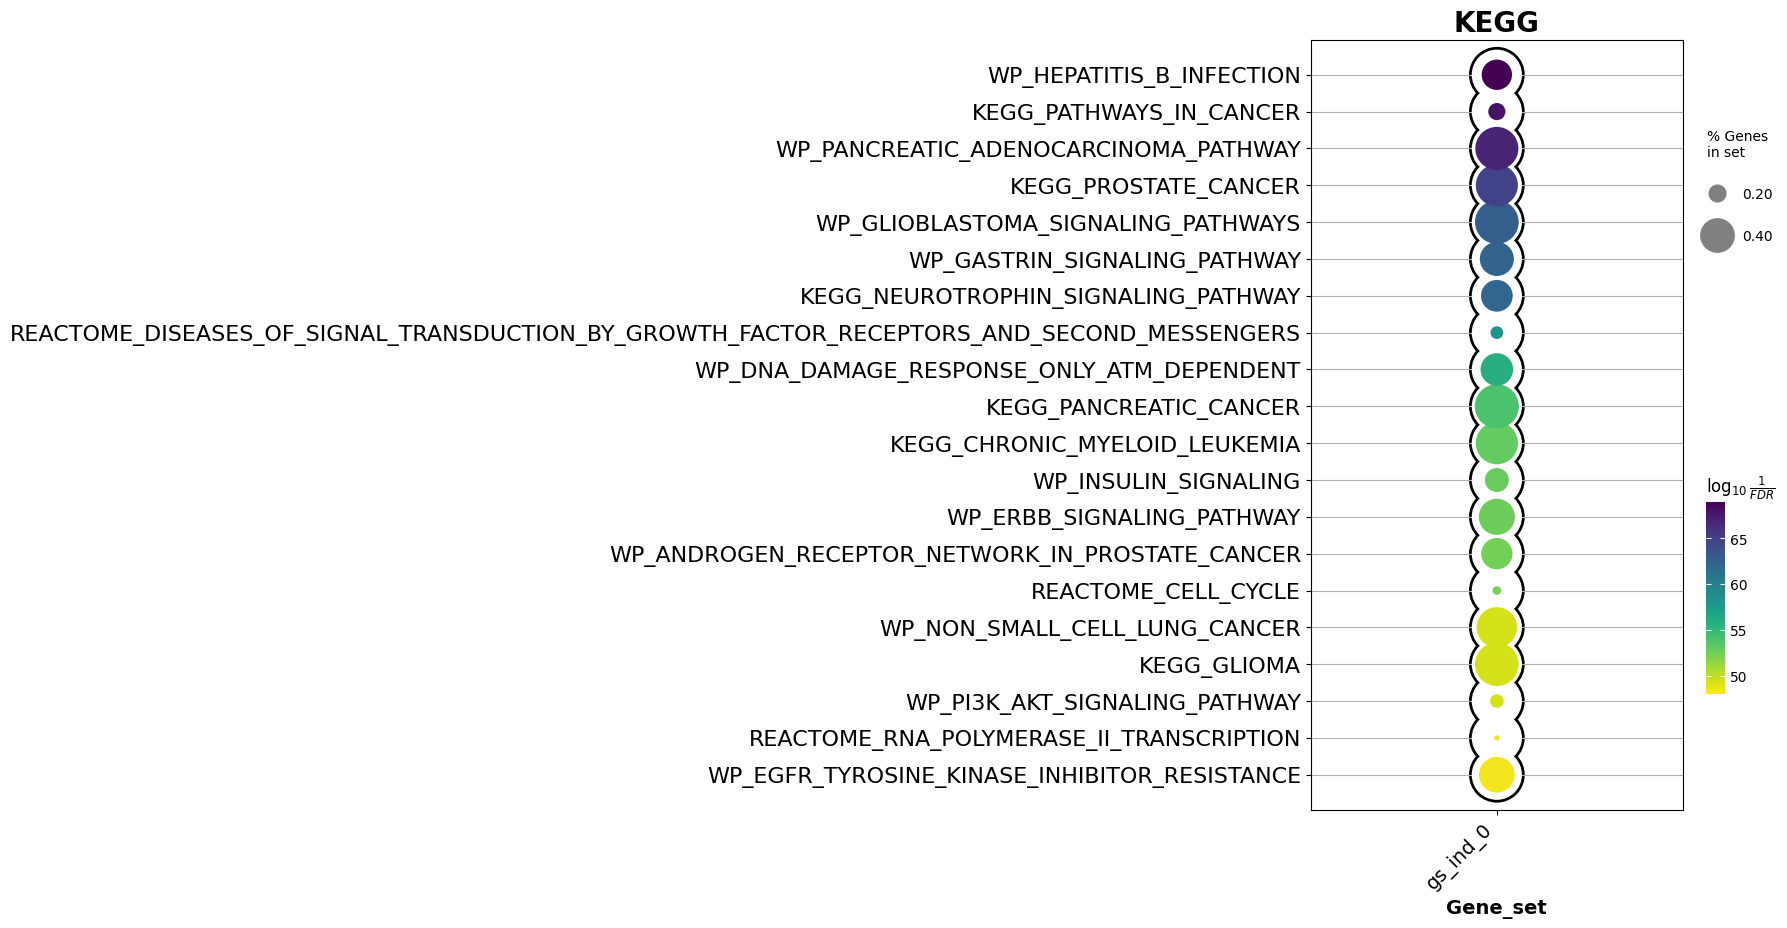

In [121]:
from gseapy import barplot, dotplot
ax = dotplot(enr_gauche.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=20,
              figsize=(6,10),
              title = "KEGG",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

In [127]:
enr_droite = gp.enrich(gene_list=list(nodes_droite_absent.index),#"drug_nodes/MELPHALAN_R_nodes.csv",
                 gene_sets=gmt,
                 # organism='human', # organism argment is ignored because user input a background
                 outdir='output/', # don't write to disk
                  )
print(enr_droite.results)   
enr_droite_df=pd.DataFrame(enr_droite.results)

      Gene_set                                        Term  Overlap   P-value  \
0     gs_ind_0                    ABBUD_LIF_SIGNALING_1_DN     1/28  0.575293   
1     gs_ind_0                    ABBUD_LIF_SIGNALING_1_UP     2/43  0.372876   
2     gs_ind_0                    ABBUD_LIF_SIGNALING_2_UP     2/13  0.056670   
3     gs_ind_0                  ABDELMOHSEN_ELAVL4_TARGETS     4/16  0.001109   
4     gs_ind_0            ABDULRAHMAN_KIDNEY_CANCER_VHL_DN     1/13  0.327973   
...        ...                                         ...      ...       ...   
5124  gs_ind_0                       ZWANG_EGF_INTERVAL_DN   12/238  0.057237   
5125  gs_ind_0                       ZWANG_EGF_INTERVAL_UP    2/112  0.854744   
5126  gs_ind_0                   ZWANG_EGF_PERSISTENTLY_DN     4/62  0.116395   
5127  gs_ind_0                   ZWANG_EGF_PERSISTENTLY_UP     3/34  0.081684   
5128  gs_ind_0  ZWANG_TRANSIENTLY_UP_BY_2ND_EGF_PULSE_ONLY  38/1959  0.999166   

      Adjusted P-value  Odd

In [128]:
enr_droite_df.sort_values(by='P-value').to_csv("right_absent_nodes_enrichment.csv")

In [24]:
hierachic_cluster.dendrogram_col.reordered_ind
df_clust=hierachic_cluster.data2d




In [25]:
df3[df3["occurence"] <2].to_csv('unique_nodes.csv')





<h1>Ajout des abbérations cytogénétiques</h1>

In [26]:
df_cyto=pd.read_csv('/home/buffard/code/Cytogenetic/cytogenetic_aberration.csv',sep='\t')
df_cyto.set_index('cell_lines',inplace=True)

df_cyto=df_cyto.transpose()

df_cyto=df_cyto[hierachic_cluster.data2d.columns]
pd.options.display.max_columns=30

pd.options.display.max_colwidth

df_cyto


df_cyto=df_cyto.style.background_gradient()

import dataframe_image as dfi
dfi.export(df_cyto, 'df_styled.png')
df_cyto

cell_lines,MOLP8,XG23,XG24,L363,XG27,XG2,XG11,XG6,OPM2,RPMI,MM1S,XG30,XG13,SKMM2,XG1,LP1,XG19,AMO1,XG29,Lopra,XG16,JJN3,XG12,XG28,XG5,MOLP2,XG20,XG26,XG7
del1p,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1
1qgain,1,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1
del13q,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,1,1,0,1,0,1,0,1,1
del17p,0,0,0,1,1,0,1,0,1,1,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0
t(4;14),0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,1
t(14;16),0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
t(11;14),1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
t(12;14),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
t(20;22),0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
t(16;22),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h1>Extract data for drugs</h1>

In [27]:
df_drugs=pd.read_csv('simplified_IC50.csv',sep="\t")  
print(df_drugs)

        HMCLs TRANSCRIPTOME MAS5 U133P RNAseq (Moreaux)  \
0         XG1                        x                x   
1         XG2                        x                x   
2         XG3                        x                x   
3         XG4                        x                x   
4         XG5                        x                x   
5         XG6                        x                x   
6         XG7                        x                x   
7        XG10                        x                x   
8        XG11                        x                x   
9        XG12                        x                x   
10       XG13                        x                x   
11       XG14                        x                x   
12       XG16                        x                x   
13       XG19                        x                x   
14       XG20                        x                x   
15       XG21                        x                x 

In [28]:
print(df_drugs.columns)
df_drugs=df_drugs[['HMCLs','MELPHALAN','Lenalidomide ','Pomalidomide','Velcade','Ixazomib','Dexamethasone ','HDACi molecule 1 ','CDK inhibitor molecule 1']]
df_drugs.set_index('HMCLs', inplace=True)
df_drugs=df_drugs.transpose()



Index(['HMCLs', 'TRANSCRIPTOME MAS5 U133P', 'RNAseq (Moreaux)',
       'RNA SEQ CUFFLINKS 66HMCLS', 'Exome Seq', 'DNA METHYLATION',
       'MIRNA profiling', 'CHIPSEQ (6 marks)', 'MELPHALAN IC50 µM D4',
       'MELPHALAN', 'LENALIDOMIDE IC50 µM D4', 'Lenalidomide ',
       'POMALIDOMIDE IC50 nM D4', 'Pomalidomide', 'VELCADE IC50 nM D4',
       'Velcade', 'IXAZOMIB IC50 nM D4', 'Ixazomib',
       'DEXAMETHASONE IC50 µM D4', 'Dexamethasone ', 'DECITABINE IC50 µM D4',
       'DNMTi molecule 1', 'VIDAZA IC50 µM D4', 'DNMTi molecule 2',
       'TSA IC50 nM D4', 'HDACi molecule 1 ', 'Panobinostat IC50 nM D4',
       'HDACi molecule 2 ', 'Acide Valproic IC50 µM D4', 'HDACi molecule 3 ',
       'SAHA IC50 nM D4', 'HDACi molecule 4 ', 'Romidepsine IC50 nM D4',
       'HDACi molecule 5 ', 'ACY1215 / Ricolinostat (HDAC6i) IC50 µM D4',
       'HDACi molecule 6 ', 'AS602868 IC50 µM D4', 'IKK2 inhibitor',
       'JQ1 IC50 nM D4', 'BET inhibitor molecule 1', 'GSK525762 IC50 nM D4',
       'BET inhibi

In [29]:
print(df_drugs['Lopra'])

MELPHALAN                   NaN
Lenalidomide                NaN
Pomalidomide                  R
Velcade                       R
Ixazomib                    NaN
Dexamethasone               NaN
HDACi molecule 1              I
CDK inhibitor molecule 1    NaN
Name: Lopra, dtype: object


In [30]:
CL_interect=[]
CL_absent=[]
for CL in df.columns:  
    if CL in df_drugs.columns:        
        CL_interect.append(CL)
    else:
        CL_absent.append(CL)
print(CL_absent)
df_drugs=df_drugs[CL_interect]
print(df_drugs)   
melphalan=df_drugs.filter(items=['MELPHALAN'], axis=0)
melphalan=df_drugs.loc["MELPHALAN"]
print(melphalan)
print(df_drugs["XG2"])

[]
HMCLs                    XG30 XG11 OPM2 XG23 SKMM2 Lopra XG27 RPMI MOLP2 XG13  \
MELPHALAN                 NaN    I    I  NaN     S   NaN    I    R   NaN    R   
Lenalidomide                I    R    S  NaN     R   NaN    I    S   NaN    I   
Pomalidomide                R    R    I    R     I     R  NaN    I   NaN    I   
Velcade                     R    I    S    R     R     R  NaN    R     I    I   
Ixazomib                  NaN    R    S  NaN     I   NaN  NaN    I     I    I   
Dexamethasone             NaN    R    I  NaN   NaN   NaN  NaN  NaN   NaN  NaN   
HDACi molecule 1            R  NaN  NaN  NaN   NaN     I  NaN  NaN   NaN  NaN   
CDK inhibitor molecule 1  NaN    S    I  NaN   NaN   NaN  NaN    I   NaN    I   

HMCLs                    XG26 MOLP8 XG19 XG24 L363 JJN3  XG1 XG28 MM1S  XG2  \
MELPHALAN                   S   NaN    S    I    I    I    I  NaN    R    S   
Lenalidomide              NaN   NaN    I    I    S    R    R  NaN    S    I   
Pomalidomide              NaN 

In [39]:
def add_drug(drug):
    series_drug=df_drugs.loc[drug]
    lut = dict(zip(["R","I","nan","S"], "rbwg"))
    col_colors = series_drug.map(lut)
    sns.clustermap(df_reduced, col_colors=col_colors,metric='hamming')
    
    handles = [Patch(facecolor=lut[name]) for name in lut]
    plt.legend(handles, lut, title='Species',
               bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')

    #extract all nodes specific to sensitive CL
    S_CL=series_drug[series_drug=='S'].index
    net_S=df_reduced[S_CL]
    nb_occ_S=net_S.sum(axis=1).sort_values(ascending=False)
    nodes_S=nb_occ_S[nb_occ_S==len(S_CL)]

    R_CL=series_drug[series_drug=='R'].index
    net_R=df_reduced[R_CL]
    nb_occ_R=net_R.sum(axis=1).sort_values(ascending=False)
    nodes_R=nb_occ_R[nb_occ_R==len(R_CL)]
    #print(nodes_R)
    #print(len(nodes_S))
    common_nodes= ((nodes_R.index.intersection(nodes_S.index)))
    print(nodes_S.drop(common_nodes))
    print(nodes_S.drop(common_nodes).size)
    nodes_S=nodes_S.drop(common_nodes)
    nodes_S.to_csv("drug_nodes/"+drug+"_S_nodes.csv")

    #extract all nodes specific for resistant cells
    R_CL=series_drug[series_drug=='R'].index
    net_R=df_reduced[R_CL]
    nb_occ_R=net_R.sum(axis=1).sort_values(ascending=False)
    nodes_R=nb_occ_R[nb_occ_R==len(R_CL)]

    S_CL=series_drug[series_drug=='S'].index
    net_S=df_reduced[S_CL]
    nb_occ_S=net_S.sum(axis=1).sort_values(ascending=False)
    nodes_S=nb_occ_S[nb_occ_S==len(S_CL)]
    #print(nodes_R)
    #print(len(nodes_S))
    common_nodes= ((nodes_S.index.intersection(nodes_R.index)))
    #print(nodes_R.drop(common_nodes))
    nodes_R=nodes_R.drop(common_nodes)
    nodes_R.to_csv("drug_nodes/"+drug+"_R_nodes.csv")
    
    
w=ipywidgets.interact(add_drug,drug=widgets.RadioButtons(
    options=['MELPHALAN','Lenalidomide ','Pomalidomide','Velcade','Ixazomib','Dexamethasone ','HDACi molecule 1 ','CDK inhibitor molecule 1'],
   value='MELPHALAN',
    description='Choose drug to display:',
    disabled=False
))


interactive(children=(RadioButtons(description='Choose drug to display:', options=('MELPHALAN', 'Lenalidomide …

In [79]:
dico_drug_nodes={}
drugs=['MELPHALAN','Lenalidomide ','Pomalidomide','Velcade','Ixazomib','Dexamethasone ','HDACi molecule 1 ','CDK inhibitor molecule 1']

for drug in drugs:
    series_drug=df_drugs.loc[drug]
    dico_drug_nodes[drug+"_R"]=[]
    dico_drug_nodes[drug+"_S"]=[]
    #extract all nodes specific to sensitive CL
    S_CL=series_drug[series_drug=='S'].index
    net_S=df_reduced[S_CL]
    nb_occ_S=net_S.sum(axis=1).sort_values(ascending=False)
    nodes_S=nb_occ_S[nb_occ_S==len(S_CL)]
    
    R_CL=series_drug[series_drug=='R'].index
    net_R=df_reduced[R_CL]
    nb_occ_R=net_R.sum(axis=1).sort_values(ascending=False)
    nodes_R=nb_occ_R[nb_occ_R==len(R_CL)]
    
    common_nodes= ((nodes_R.index.intersection(nodes_S.index)))

    nodes_S=nodes_S.drop(common_nodes)
    #nodes_S.to_csv("drug_nodes/"+drug+"_S_nodes.csv")
    
    #extract all nodes specific for resistant cells
    R_CL=series_drug[series_drug=='R'].index
    net_R=df_reduced[R_CL]
    nb_occ_R=net_R.sum(axis=1).sort_values(ascending=False)
    nodes_R=nb_occ_R[nb_occ_R==len(R_CL)]
    
    S_CL=series_drug[series_drug=='S'].index
    net_S=df_reduced[S_CL]
    nb_occ_S=net_S.sum(axis=1).sort_values(ascending=False)
    nodes_S=nb_occ_S[nb_occ_S==len(S_CL)]
    
    common_nodes= ((nodes_S.index.intersection(nodes_R.index)))
    
    nodes_R=nodes_R.drop(common_nodes)
    dico_drug_nodes[drug+"_R"]=list(nodes_R.index)
    dico_drug_nodes[drug+"_S"]=list(nodes_S.index)
    #nodes_R.to_csv("drug_nodes/"+drug+"_R_nodes.csv")


In [373]:
df_lenalidomide_R=pd.read_csv('drug_nodes/Lenalidomide _R_nodes.csv')
print(df_lenalinomide_R)
df_pomalidomide_S=pd.read_csv('drug_nodes/Lenalidomide _S_nodes.csv')
print(set(df_pomalidomide_S["nodes"]).intersection(set(df_lenalidomide_R["nodes"])))

     nodes  0
0   H2BC21  9
1     KRAS  9
2     CDK4  9
3     CBFB  9
4   MAP3K4  9
5   IQGAP1  9
6   H2BC17  9
7    EP300  9
8    H2AB1  9
9    H2AZ2  9
10   H2AZ1  9
11   H2BC3  9
12   H2BC5  9
13   H2BC9  9
14  H2BC11  9
15  H2BC12  9
16  H2BC14  9
17    HRAS  9
18  PIK3CD  9
19  MAP2K2  9
20   VEGFA  9
21   FOXO1  9
22    JAK2  9
23    MDM4  9
24    RAF1  9
25  CTNNB1  9
26   CREB1  9
27    ARAF  9
28    RHOA  9
{'CASP6', 'DYNLL2', 'PDPK1', 'SUMO1', 'BRCA1', 'SHC1', 'CASP7', 'MAPK11', 'RELA', 'BARD1', 'STAT1', 'NLK', 'DYNLL1', 'SLC2A1', 'MAPK6', 'GAB2', 'CASP10', 'CHUK', 'UBTF', 'BAG4', 'PML', 'ERBB2', 'OCRL', 'H2AC12', 'CDK1', 'RUNX1', 'PPP2R5C', 'BAX', 'FGFR4', 'PTEN', 'APAF1', 'PRKAG1', 'SESN1', 'ELK1', 'PPP2R1B', 'PRKAG2', 'MTOR', 'PRKCB', 'NCAPH2', 'PRKAA1', 'KDM4B', 'MAP3K5', 'TRAF6', 'STAG2', 'PFN1', 'IRS1', 'SESN2', 'HSPA8', 'UBE2N', 'UBE2D1', 'AP3B1', 'NFKB1', 'IKBKB', 'PIK3C2A', 'HSPA5', 'ITCH', 'BAK1', 'TSC2', 'CASP3', 'CDKN1B', 'TRAF2', 'MYD88', 'PLK1', 'NCAPG2', 'PRKAB

In [80]:
import gseapy as gp
from gseapy import Msigdb
msig = Msigdb()
#msig.list_dbver()
#msig.list_category(dbver="2023.2.Hs")
gmt = msig.get_gmt(category='c2.all', dbver="2023.2.Hs")

   
enr_bg = gp.enrich(gene_list=['CASP6', 'DYNLL2', 'PDPK1', 'SUMO1', 'BRCA1', 'SHC1'],#"drug_nodes/MELPHALAN_R_nodes.csv",
                 gene_sets=gmt,
                 # organism='human', # organism argment is ignored because user input a background
                 outdir='output/', # don't write to disk
                  )
print(enr_bg.results)                 

     Gene_set                                              Term Overlap  \
0    gs_ind_0                           ACEVEDO_LIVER_CANCER_DN   1/540   
1    gs_ind_0  ACEVEDO_NORMAL_TISSUE_ADJACENT_TO_LIVER_TUMOR_DN   1/354   
2    gs_ind_0   ACOSTA_PROLIFERATION_INDEPENDENT_MYC_TARGETS_DN   1/116   
3    gs_ind_0          AGUIRRE_PANCREATIC_CANCER_COPY_NUMBER_DN   1/237   
4    gs_ind_0                           BENPORATH_CYCLING_GENES   2/648   
..        ...                                               ...     ...   
686  gs_ind_0                        YOSHIMURA_MAPK8_TARGETS_UP  1/1282   
687  gs_ind_0                                   YU_BAP1_TARGETS    1/29   
688  gs_ind_0                ZHANG_BREAST_CANCER_PROGENITORS_UP   1/433   
689  gs_ind_0                   ZHAN_MULTIPLE_MYELOMA_SUBGROUPS    1/30   
690  gs_ind_0          ZHOU_CELL_CYCLE_GENES_IN_IR_RESPONSE_6HR    1/84   

      P-value  Adjusted P-value  Odds Ratio  Combined Score       Genes  
0    0.138005          0.

In [109]:
from Bio import Entrez
from Bio import Medline

publi=pd.DataFrame()
publi_count=[]
title_list=[]
for node in dico_drug_nodes["MELPHALAN_R"]:
    MAX_COUNT = 10
    
    TERM = node+' melphalan myeloma'
    
    #print('Getting {0} publications containing {1}...'.format(MAX_COUNT, TERM))
    Entrez.email = 'marion.buffard@umontpellier.fr'
    h = Entrez.esearch(db='pubmed' , term=TERM)#retmax=MAX_COUNT
    result = Entrez.read(h)
    #print('Total number of publications containing {0}: {1}'.format(TERM, result['Count']))
    publi_count.append(result['Count'])
    ids = result['IdList']
    h = Entrez.efetch(db='pubmed', id=ids, rettype='medline', retmode='text')
    records = Medline.parse(h)
    for record in records:
        ti = record.get('TI', '?')
        title_list.append(ti)
    
publi=pd.DataFrame(data={"MELPHALAN_R_nodes":dico_drug_nodes["MELPHALAN_R"],"MELPHALAN_R_publi":publi_count},"MELPHALAN_R_title")  
print(publi)


   MELPHALAN_R_nodes MELPHALAN_R_publi
0             CDC25C                 2
1                CSK                 1
2              FOXO4                 0
3               JAK2                 3
4              FOXO1                 0
..               ...               ...
65              BRAF                 3
66              GRB2                 0
67              E2F1                 2
68              E2F2                 0
69              EZH2                 2

[70 rows x 2 columns]


   MELPHALAN_R_nodes  MELPHALAN_R_publi
2              FOXO4                  0
4              FOXO1                  0
9               CREM                  0
11             PRKCD                  0
12            UBE2D1                  0
13              RHOA                  0
14            MAP3K4                  0
18              SHC1                  0
21              ARAF                  0
22              RAF1                  0
25              HSF1                  0
27            MAPK12                  0
28            H2BC12                  0
29            H2BC14                  0
31            MAPK13                  0
32            H2BC21                  0
33             MAPK9                  0
34             MAPK8                  0
35             MAPK3                  0
36             MAPK1                  0
37              CBFB                  0
38             H2BC9                  0
39             H2BC5                  0
40             H2BC3                  0


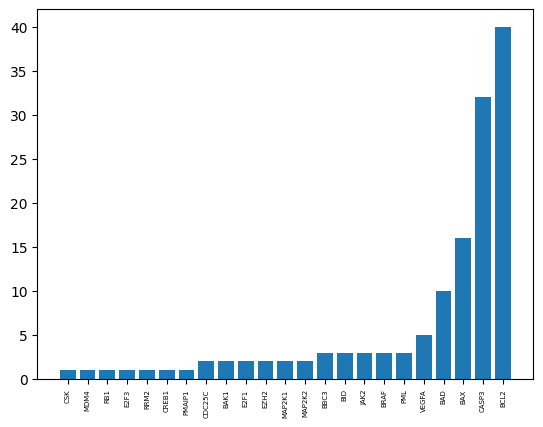

In [108]:
#publi=publi.sort_values(by = 'MELPHALAN_R_publi')
print(publi[publi["MELPHALAN_R_publi"]==0])

publi["MELPHALAN_R_publi"]=publi["MELPHALAN_R_publi"].astype(int)
publi_filtered=publi.drop(publi[publi["MELPHALAN_R_publi"]==0].index,axis=0)
publi_filtered=publi_filtered.drop(publi_filtered[publi_filtered["MELPHALAN_R_publi"]>=100].index,axis=0)
publi_filtered=publi_filtered.sort_values(by = 'MELPHALAN_R_publi')
fig, ax = plt.subplots()
ax.bar(publi_filtered["MELPHALAN_R_nodes"],publi_filtered["MELPHALAN_R_publi"])
for tickLabel in ax.get_xticklabels():
  tickLabel.set_fontsize(5)
plt.xticks(rotation=90)
plt.savefig("melphalanR_publis.svg",format="svg")
plt.show()

In [ ]:
Peut on classifier les IC 50 en fonction de leur apparte ance au R vs S

105
        L363  XG16  SKMM2  JJN3  XG12  XG24  XG13  XG1  XG20  XG6  XG26  XG29  \
nodes                                                                           
CASP6      1     1      1     0     0     1     1    1     1    1     1     1   
RHOA       1     0      1     1     1     1     1    1     1    1     1     0   
H2BC9      1     0      1     1     1     1     1    1     1    1     1     0   
CSK        1     0      0     0     1     1     1    1     1    1     1     0   
BRCA1      1     1      1     1     1     1     1    1     1    1     1     1   
...      ...   ...    ...   ...   ...   ...   ...  ...   ...  ...   ...   ...   
CHEK2      1     0      1     0     1     1     1    1     1    1     1     1   
BCL2       1     0      1     1     0     1     1    1     1    1     1     0   
DDB2       1     0      1     0     0     1     1    1     1    1     1     1   
MAP3K1     1     1      1     0     1     1     1    1     1    1     1     0   
BRAF       1     0      

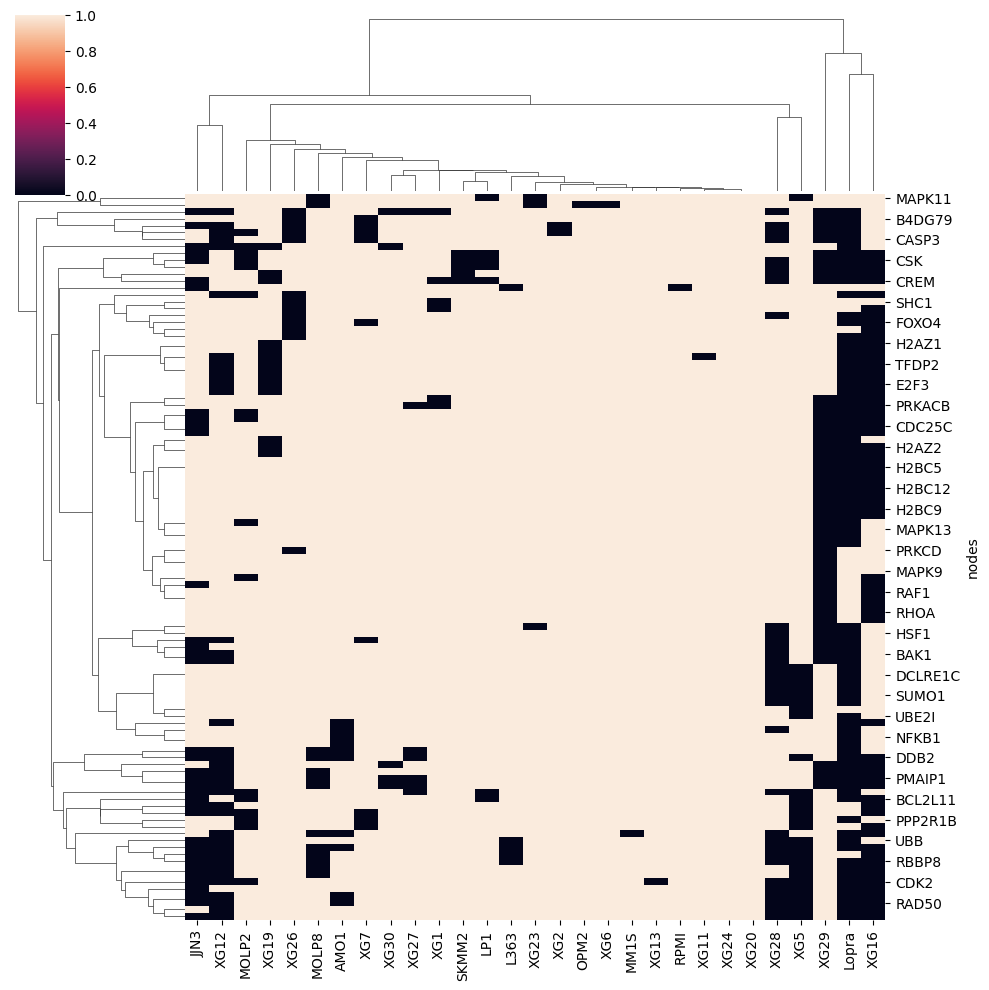

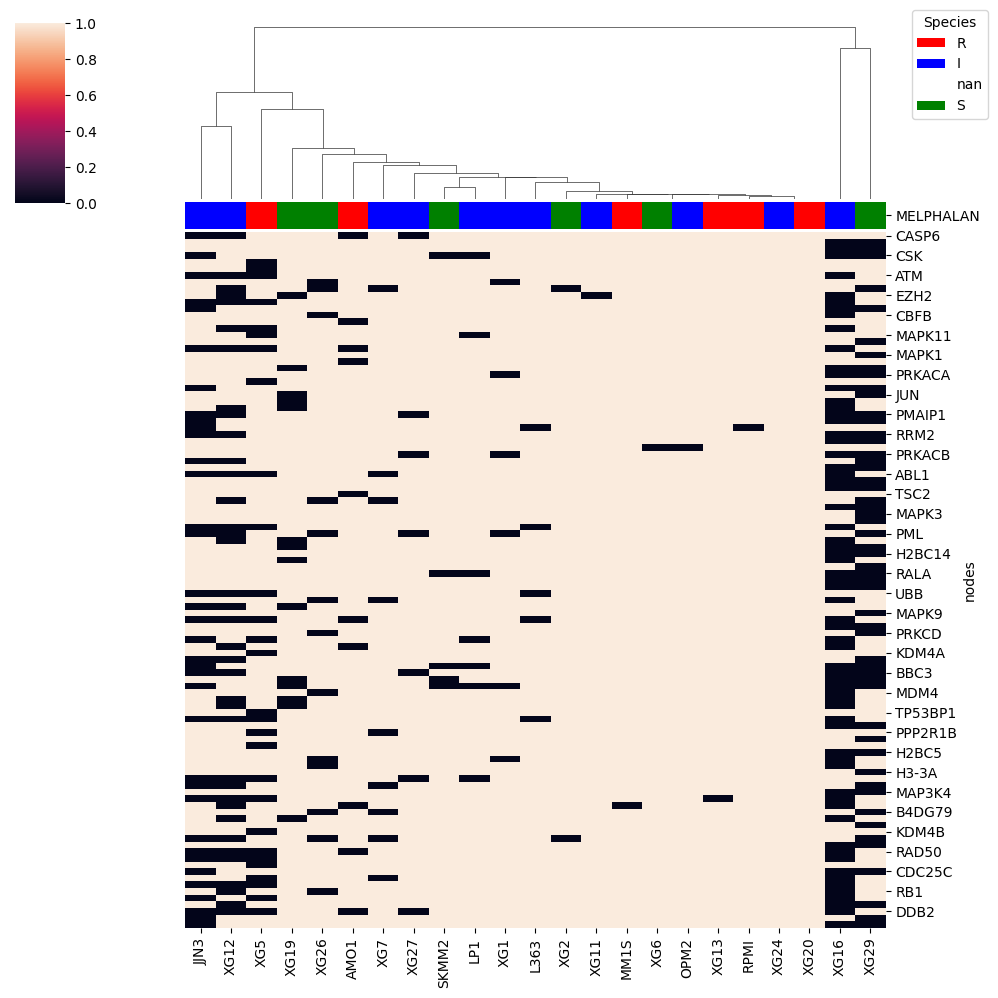

In [684]:
#recupere les listes des noeuds specifiques resistant VS Sensibles
df_melphalan_S=pd.read_csv('drug_nodes/MELPHALAN_S_nodes.csv')
df_melphalan_R=pd.read_csv('drug_nodes/MELPHALAN_R_nodes.csv')
#Fait l'union des deux
melphalan=set(df_melphalan_S["nodes"]).union(set(df_melphalan_R["nodes"]))
melphalan=list(melphalan)
print(len(melphalan))
#extrait la matrice de presences absences des noeuds incluts dans R ou S
df_melphalan=df_reduced.loc[melphalan,:]


hierachic_cluster=sns.clustermap(df_melphalan,xticklabels=True,metric='hamming',col_cluster=True)
series_drug=df_drugs.loc['MELPHALAN']
R_CL=series_drug[series_drug=='R'].index
S_CL=series_drug[series_drug=='S'].index
I_CL=series_drug[series_drug=='I'].index
union=set(R_CL).union(set(S_CL)).union(set(I_CL))
df_melphalan=df_melphalan.loc[:,list(union)]
#hierachic_cluster=sns.clustermap(df_melphalan,xticklabels=True,metric='hamming',col_cluster=True)

lut = dict(zip(["R","I","nan","S"], "rbwg"))
col_colors = series_drug.map(lut)
sns.clustermap(df_melphalan, col_colors=col_colors,metric='hamming',row_cluster=False)
    
handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Species',
               bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
print(df_melphalan)

<h1>Ajout des données RNAseq</h1>

In [706]:
transcriptome_df=pd.read_csv("/home/buffard/code/données_transcriptome/count.normalized_uniprot_mapped.csv",sep="\t")

transcriptome_df=transcriptome_df.dropna(axis=0, how="any", subset=["uniprot"])
import converter
gene_list= []
for uniprot in transcriptome_df["uniprot"].values:
    gene_list.append(converter.handler.to_symbol(uniprot))
transcriptome_df['gene']=gene_list

transcriptome_df=transcriptome_df.set_index('gene')
transcriptome_df_melphalan=transcriptome_df.loc[:,list(union)] # list CL S,R et I pour le melphalan

intersect_rna=set(melphalan).intersection(set(list(transcriptome_df_melphalan.index))) #melphalan union S et R nodes

#print(intersect_rna)

#transcriptome_df_melphalan=transcriptome_df_melphalan.loc[list(intersect_rna),:]
#alternative 
transcriptome_df_melphalan=transcriptome_df_melphalan.loc[df_melphalan_S["nodes"],:]
#print(transcriptome_df_melphalan.dtypes)
print(transcriptome_df_melphalan)
transcriptome_df_melphalan=transcriptome_df_melphalan.replace(0,np.nan) #clean nan value

             L363      XG16     SKMM2     JJN3      XG12      XG24     XG13  \
gene                                                                          
PIDD1     1260.98   1177.16   1069.32  1599.50   2591.60   1364.57  1734.15   
COP1      2784.42   3915.95   1808.80  2335.64   2472.28   3653.11  2917.31   
DDB2      1508.91   1209.59    723.34  1071.94   3776.46   3114.06  1226.59   
CASP6      459.94   1230.16    413.21  1252.47   2048.37   1148.31   197.76   
MAPK11    1023.32     64.87    423.96   641.67    499.27     78.28   666.45   
RPA2      3075.95   4798.82   3121.92  4781.66   4955.03   4301.10  4051.31   
BRCA1     3544.43   4120.84   4365.14  7811.35   4637.88   4554.49  4189.63   
CDK2      3397.39   2181.06   2533.03  2750.01   3917.76   2826.79  3187.09   
TSC2      3553.84   4461.02   4503.17  3404.78   4417.03   3707.18  3838.68   
CCND3     1271.24   1019.73    655.22  1505.02   2947.48   2671.85  1228.88   
DCLRE1C   1293.47   1405.00   1228.87   970.92   111

On perd 4 noeuds qui ne sont pas dans le RNAseq -> ne faudrait il pas les enlever du réseau

In [707]:
go_terms=pd.read_csv("list_GO_DNA_damage_response.csv")

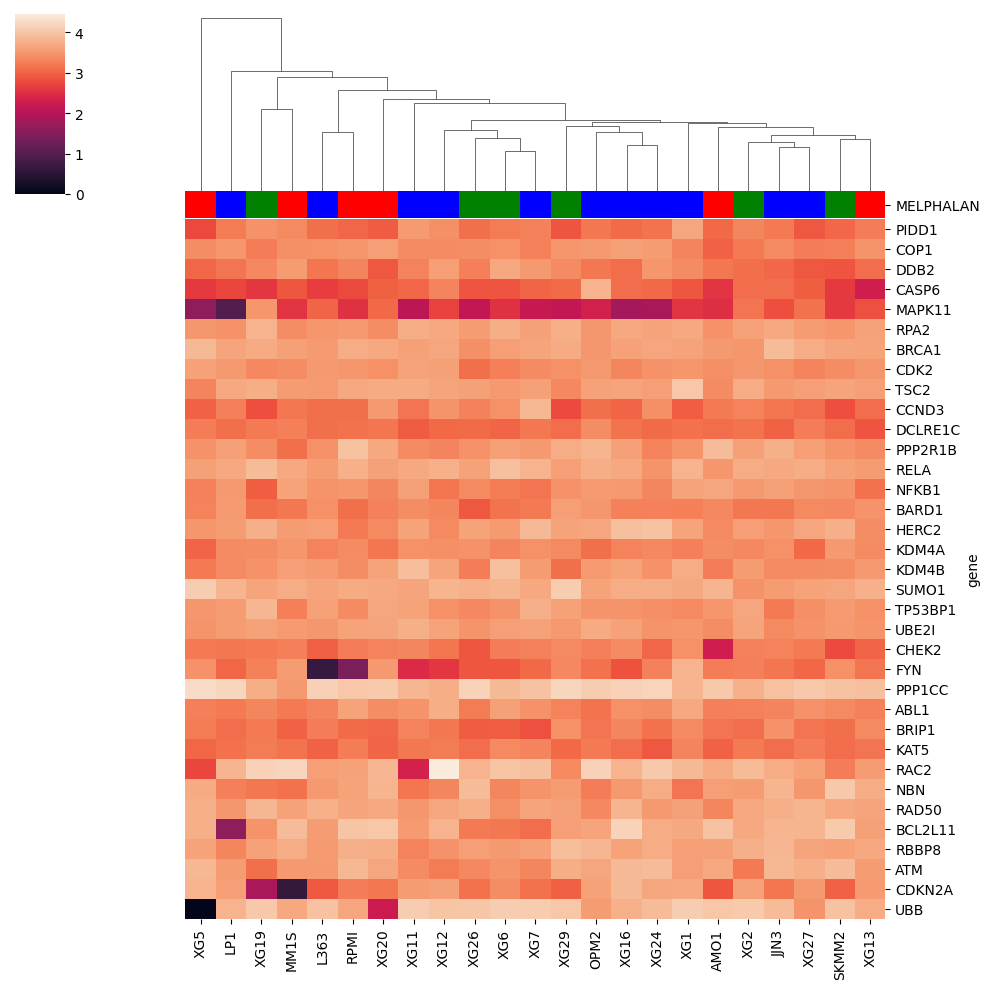

In [708]:
#print(transcriptome_df_melphalan[transcriptome_df_melphalan>8000])
#print(union)
transcriptome_df_melphalan_log=transcriptome_df_melphalan
for CL in union:
    transcriptome_df_melphalan_log[CL]=np.log10(transcriptome_df_melphalan[CL])
    #print(transcriptome_df_melphalan[CL])
    #print(CL)

transcriptome_df_melphalan_log=transcriptome_df_melphalan_log.fillna(0)
#alternative filtre GO
#transcriptome_df_melphalan_log=transcriptome_df_melphalan_log.loc[list(go_terms.columns),:]
'''
with pd.option_context('display.max_rows', None):
    display(transcriptome_df_melphalan)'''
transcriptome_df_melphalan_log.to_csv("melpalan_nodes.csv")
sns.clustermap((transcriptome_df_melphalan_log), col_colors=col_colors,row_cluster=False)


<h1>PCA extraction des noeuds</h1>

gene     CASP6       CSK    BRCA1     SUMO1      SHC1     EZH2     COP1  \
L363    459.94   4664.36  3544.43   4519.88   4894.33  4655.81  2784.42   
XG16   1230.16   8377.76  4120.84   5504.48   7374.64  6825.62  3915.95   
SKMM2   413.21   4588.32  4365.14   4642.10   5735.63  5635.24  1808.80   
JJN3   1252.47   4135.31  7811.35   3581.56   3770.51  4767.62  2335.64   
XG12   2048.37  12358.26  4637.88   6578.44   7022.24  6933.27  2472.28   
XG24   1148.31   7555.58  4554.49   5628.56  18171.15  6606.59  3653.11   
XG13    197.76   9906.49  4189.63   6081.53   4802.35  4930.38  2917.31   
XG1     753.62   7135.87  4181.54   5012.21   4525.46  6996.80  2049.42   
XG20    936.33  14099.95  4809.15   4995.98  10583.20  3566.20  3836.55   
XG6     722.12  21596.88  3784.92   6685.85   8317.99  4589.66  2786.62   
XG26    724.90   6574.65  2630.48   6068.35   6964.42  5140.31  2490.24   
XG29   1203.09   4766.35  5251.70  12285.04   6609.71  8154.12  3126.33   
AMO1    360.18   5344.14 

<Axes: xlabel='PC1', ylabel='PC2'>

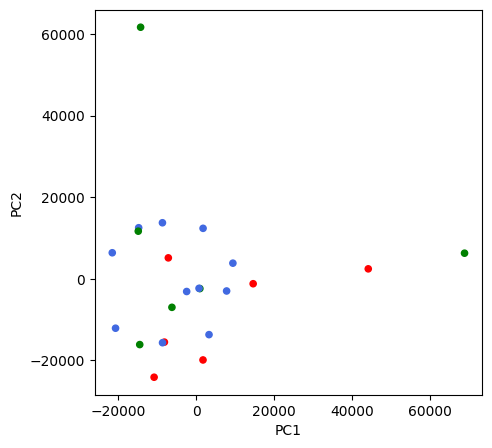

In [674]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


transcriptome_df_melphalan=transcriptome_df_melphalan.transpose()
transcriptome_df_melphalan=transcriptome_df_melphalan.fillna(0)
print(transcriptome_df_melphalan)
X_pca=pca.fit_transform(transcriptome_df_melphalan)
pca_columns=['PC' + str(c) for c in range(1, X_pca.shape[1]+1, 1)]
X_pca = pd.DataFrame(X_pca, index=transcriptome_df_melphalan.index, columns=pca_columns)
X_pca
dict_colors = {'S': 'green', 'I': 'royalblue', 'R': 'red'} 
print(union)
print(series_drug[list(union)])
y=series_drug[list(union)]
print(y
y_colors = [dict_colors[yi] for yi in y]

X_pca.plot(x='PC1', y='PC2', kind='scatter', figsize=(5, 5), color=y_colors)

In [679]:
transcriptome_df_melphalan['response']=y
transcriptome_df_melphalan=transcriptome_df_melphalan.fillna(0)
print(transcriptome_df_melphalan)
sns_plot=sns.pairplot(transcriptome_df_melphalan,hue='response')
fig = sns_plot.fig
fig.savefig("out.png") 

gene     CASP6       CSK    BRCA1     SUMO1      SHC1     EZH2     COP1  \
L363    459.94   4664.36  3544.43   4519.88   4894.33  4655.81  2784.42   
XG16   1230.16   8377.76  4120.84   5504.48   7374.64  6825.62  3915.95   
SKMM2   413.21   4588.32  4365.14   4642.10   5735.63  5635.24  1808.80   
JJN3   1252.47   4135.31  7811.35   3581.56   3770.51  4767.62  2335.64   
XG12   2048.37  12358.26  4637.88   6578.44   7022.24  6933.27  2472.28   
XG24   1148.31   7555.58  4554.49   5628.56  18171.15  6606.59  3653.11   
XG13    197.76   9906.49  4189.63   6081.53   4802.35  4930.38  2917.31   
XG1     753.62   7135.87  4181.54   5012.21   4525.46  6996.80  2049.42   
XG20    936.33  14099.95  4809.15   4995.98  10583.20  3566.20  3836.55   
XG6     722.12  21596.88  3784.92   6685.85   8317.99  4589.66  2786.62   
XG26    724.90   6574.65  2630.48   6068.35   6964.42  5140.31  2490.24   
XG29   1203.09   4766.35  5251.70  12285.04   6609.71  8154.12  3126.33   
AMO1    360.18   5344.14 

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<H1>Etudes des caractéristiques des graphes - extraction des noeuds des réseaux</H1>

In [ ]:
df=df[['HMCLs','MELPHALAN','Lenalidomide ','Pomalidomide','Velcade','Ixazomib','Dexamethasone ','HDACi molecule 2 ']]
df.set_index('HMCLs', inplace=True)


In [6]:
input_folder="reconstruct_200324_cyto_rnaseq64_all_pathways/"

df_betweeness=df.replace(0, np.nan, inplace=False)
df_betweenessbis=df.replace(0, np.nan, inplace=False)
df_outdegree=df.replace(0, np.nan, inplace=False)
df_indegree=df.replace(0, np.nan, inplace=False)
for f in listdir(input_folder):
    file_name=input_folder+f+"/all_targets/"+f+"_shortest_all_targets.txt_edges.tsv"
    interaction=near_shortest_undirected.load_full_graph_unweihted(file_name)
    G=near_shortest_undirected.load_interactions_unweighted (interaction) #return a digraph
    Gbis=nx.to_undirected(G)
    centrality=nx.betweenness_centrality(G)
    centralitybis=nx.betweenness_centrality(Gbis)
    outdegree=G.out_degree()
    indegree=G.in_degree()
    values=list(centrality.values())
    valuesbis=list(centralitybis.values())
    for key in centrality.keys():
        
        df_betweeness.loc[df_betweeness.index==uni_to_name[key], f]=centrality[key]
        df_outdegree.loc[df_outdegree.index==uni_to_name[key], f]=outdegree[key]
        df_indegree.loc[df_indegree.index==uni_to_name[key], f]=indegree[key]
        df_betweenessbis.loc[df_betweeness.index==uni_to_name[key], f]=centralitybis[key]
    file.close()   






print(max(values)+5/100*max(values))
#print(np.percentile(np.array(values),70,method='higher'))

0.16354165846575752


ValueError: The condensed distance matrix must contain only finite values.

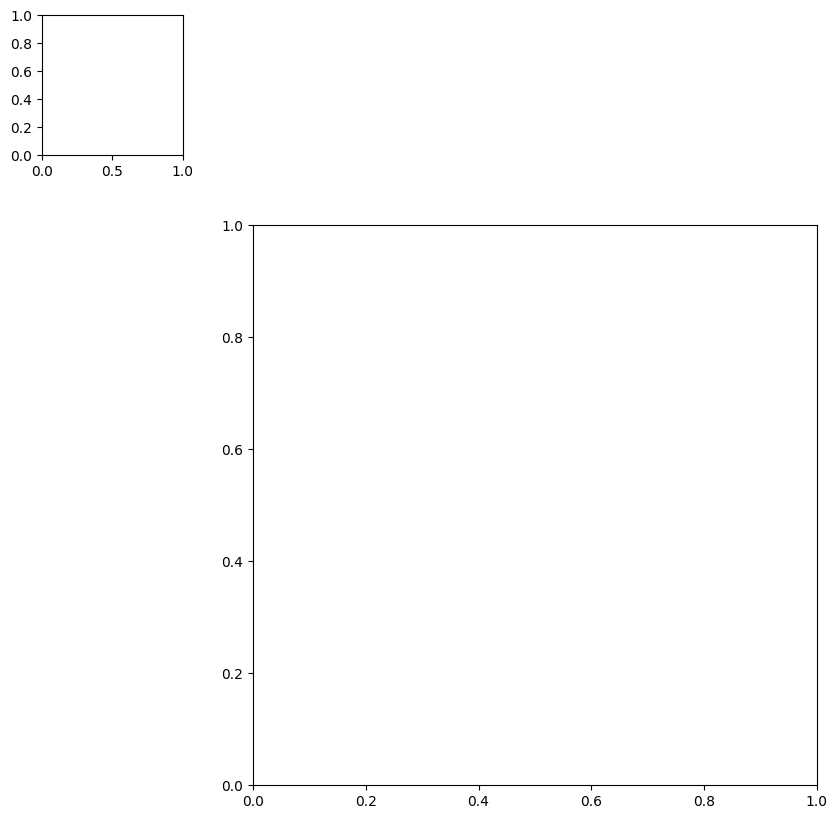

In [7]:
hierachic_cluster=sns.clustermap(df_betweeness,xticklabels=True,col_cluster=True)

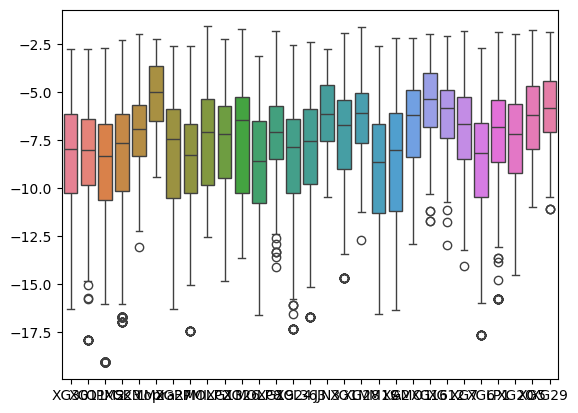

In [10]:
df_betweeness.nlargest(50,columns="Lopra")['Lopra']
df_betweeness[df_betweeness == 0] = np.nan
sns.boxplot(np.log(df_betweeness))
sns.set(rc={'figure.figsize':(20,20)})
plt.show()

In [ ]:
for CL in df_betweeness.columns:
    #np.log(df_betweeness[CL]).hist()
    sns.displot(np.log(df_betweeness[CL]),kind="kde")
    plt.show
    values=np.array(np.log(df_betweeness[CL]))

    
    
    print(CL)
    stat=scipy.stats.normaltest(values,nan_policy='omit')
    
    print(stat)
    print(stat.pvalue)

    
    

In [ ]:

betweness_set=set()
degree_set=set()
indegree_set=set()
betweness_set=df_betweeness[df_betweeness["XG30"]==0].index
degree_set=df_outdegree[df_outdegree["XG30"]==0].index
indegree_set=df_indegree[df_indegree["XG30"]==0].index
print(len(degree_set))
print(len(indegree_set))
print(len(betweness_set))
print(degree_set.intersection(betweness_set))
print(len(indegree_set.intersection(betweness_set)))


In [ ]:
df_betweeness['XG30'].sort_values()

In [ ]:
input_folder="reconstruct_200324_cyto_rnaseq64_all_pathways/"
df_degree=df.astype(float)
for f in listdir(input_folder):
    file_name=input_folder+f+"/all_targets/"+f+"_shortest_all_targets.txt_edges.tsv"
    interaction=near_shortest_undirected.load_full_graph_unweihted(file_name)
    G=near_shortest_undirected.load_interactions_unweighted (interaction)
    
    degrees=nx.degree(G)
    
    for degree in degrees:
        
        df_degree.loc[df_degree.index==uni_to_name[degree[0]], f]=degree[1]

    file.close()   

In [ ]:
df_degree.nlargest(50,columns="Lopra")['Lopra']
df_degree[df_degree == 0] = np.nan
sns.set(rc={'figure.figsize':(15,15)})
sns.boxplot(np.log(df_degree))

plt.show()

In [ ]:
for CL in df_degree.columns:
    #np.log(df_betweeness[CL]).hist()
    sns.displot(np.log(df_degree[CL]),kind="kde")
    values=np.array(np.log(df_degree[CL]))
    print(CL)
    stat=scipy.stats.normaltest(values,nan_policy='omit')
    print(stat)
    print(stat.pvalue)